In [1]:
%run findSpectrum.py

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
checks = True
plots = True

In [4]:
nLat = 2**9; print(nLat)
lenLat = 2000
lamb = 0.028
frac = 2.

spectrum = Spectrum(nLat, lenLat, lamb, frac)
xL, kL, knyq, dx, dk, invFTcoeffs, dirFTcoeffs = spectrum.getLattice()

512


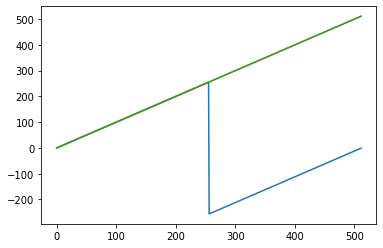

In [5]:
plt.plot(kL/dk)
plt.plot(np.mod(kL/dk,nLat))
plt.plot(np.mod(xL/dx,nLat))

In [6]:
if checks == True:
    
    tMbool = True
    if np.abs(np.sum(dirFTcoeffs) - 1.) > 1e-12 or np.abs(np.sum(invFTcoeffs)/nLat - 1.) > 1e-12:
        print(np.abs(np.sum(dirFTcoeffs)))
        print(np.abs(np.sum(invFTcoeffs)/nLat))
        print('Fourier Coefficients not properly normalized.')
        tMbool = False
    # Check FT conventions match:
    # The two vectors should be infinitesimally close
    Uxlist = spectrum.Ux(lamb)
    Uklist = spectrum.Uk()    
    a = Uxlist - np.tensordot(Uklist, invFTcoeffs, axes=(0,1))
    if np.abs(np.mean(np.real(a))) > 1e-12 or np.abs(np.mean(np.imag(a))) > 1e-12:
        print('FT conventions do not match.')
        tMbool = False

    # Compute spectrum and check Hermiticity
    En, phin, phik = spectrum.eigenspectrum()
    sensitivity, EnV, phinV, phikV = spectrum.getNonDegenerateSpectrum()
    if np.abs(sensitivity) > 1e-12:
        print('Real eigenvectors assumption not valid; min norm:', sensitivity)
        tMbool = False
    else:
        print('Sensitivity ', sensitivity)

Real eigenvectors assumption not valid; min norm: 0.04419417382415898


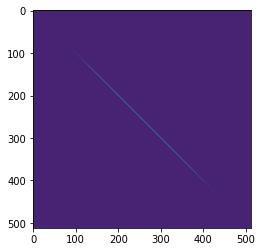

In [7]:
H = spectrum.Hamiltonian()
plt.imshow(np.transpose(H))

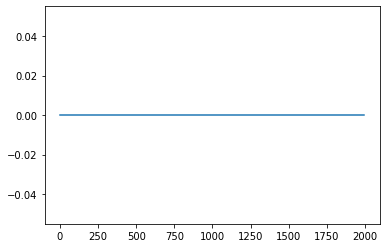

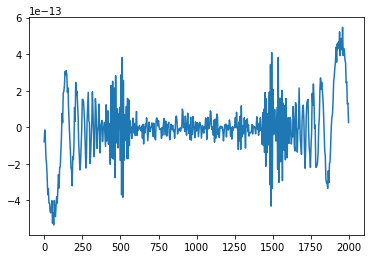

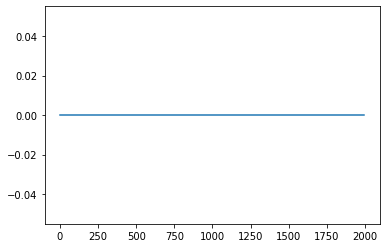

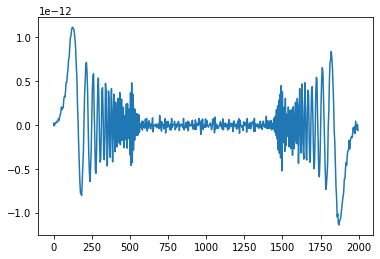

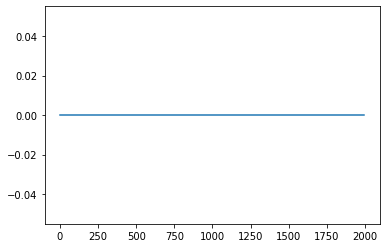

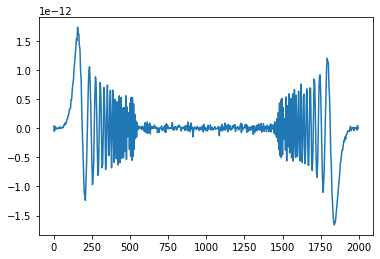

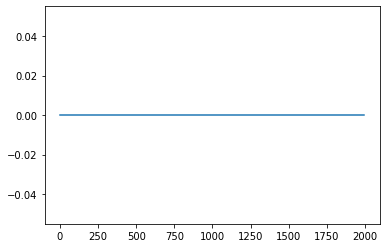

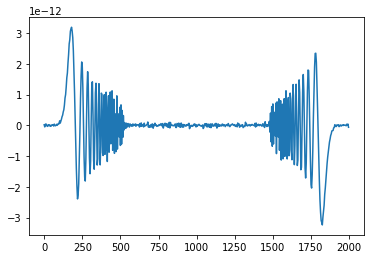

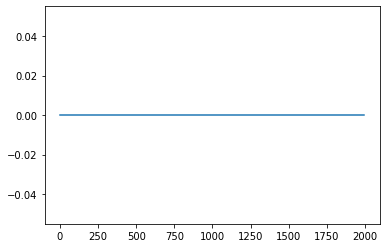

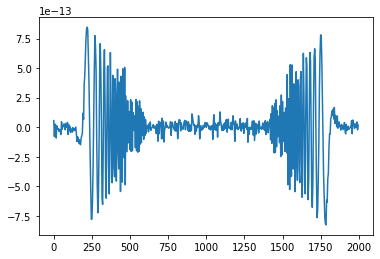

In [8]:
if True:
    # Check that transfMatrix does what it should
    # (i.e. convert between the Hamiltonian eigenbasis to the x-space basis):
    transfMatrix = spectrum.transfMatrix(phikV)
    for n in range(0, knyq//50):
        test = [0. if i!=n else 1. for i in range(knyq)]
        vector = np.dot(np.transpose(transfMatrix),test)
        plt.plot(xL, vector-transfMatrix[n])
        plt.show()
        if plots:
            plt.plot(xL, np.real(np.tensordot(vector, invFTcoeffs, axes=(0,0)))-np.sqrt(nLat)*np.real(phinV[n]))
            plt.show()
        if np.any(transfMatrix[n]-vector) != 0.:
            print('transfMatrix not calibrated.')
            tMbool = False
    if tMbool:
        print('All is well, proceed.')

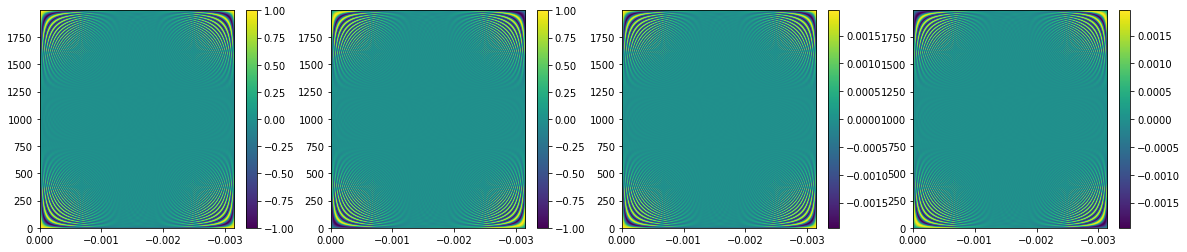

In [9]:
# Plot Fourier coefficients
ext=(kL[0], kL[-1], xL[0], xL[-1])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(20,4), ncols=4)
im1=ax1.imshow(np.real(invFTcoeffs), extent=ext, aspect="auto")
im2=ax2.imshow(np.imag(invFTcoeffs), extent=ext, aspect="auto")
im3=ax3.imshow(np.real(dirFTcoeffs), extent=ext, aspect="auto")
im4=ax4.imshow(np.imag(dirFTcoeffs), extent=ext, aspect="auto")
plt.colorbar(im1, ax=ax1); plt.colorbar(im2, ax=ax2)
plt.colorbar(im3, ax=ax3); plt.colorbar(im4, ax=ax4)
plt.show()

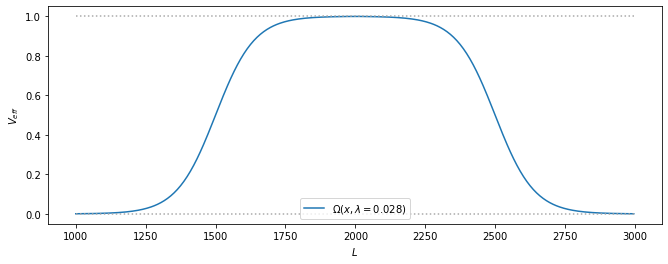

In [10]:
# Show potential and its FT
fig, ax = plt.subplots(figsize=(11, 4))
#for lamb in np.geomspace(0.0028, 1, 1)[::-1]:
for lmm in [0.028]:
    plt.plot(xL+nLat*dx/2., spectrum.Ux(lmm), label=r'$\Omega(x, \lambda = $'+str(np.round(lmm,10))+r'$)$')
plt.plot(xL+nLat*dx/2., np.ones(len(xL))*1., ls=':', color='darkgray')
plt.plot(xL+nLat*dx/2., np.ones(len(xL))*0., ls=':', color='darkgray')
plt.xlabel(r'$L$')
plt.ylabel(r'$V_{eff}$')
plt.legend(loc='lower center')
#plt.plot(kL/dk*dx, np.real(Uklist))
plt.show()

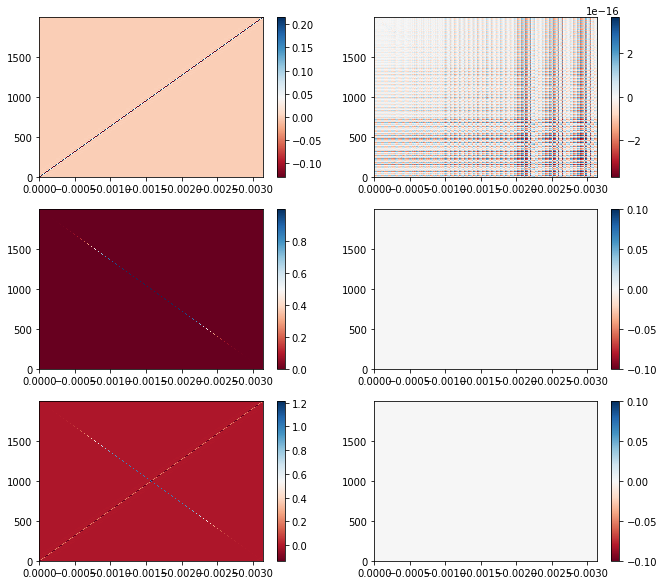

In [11]:
# Visualize terms in the Hamiltonians
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6))=plt.subplots(figsize=(11, 10), ncols=2, nrows=3)
rlL = ax1.imshow(np.real(spectrum.kineticTerm()), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
imL = ax2.imshow(np.imag(spectrum.kineticTerm()), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
rlPt = ax3.imshow(np.real(spectrum.potentialTerm()), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
imPt = ax4.imshow(np.imag(spectrum.potentialTerm()), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
fullH = ax5.imshow(np.real(spectrum.Hamiltonian()), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
imfullH = ax6.imshow(np.imag(spectrum.Hamiltonian()), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
fig.colorbar(rlL, ax=ax1); fig.colorbar(imL, ax=ax2);
fig.colorbar(rlPt, ax=ax3); fig.colorbar(imPt, ax=ax4);
fig.colorbar(fullH, ax=ax5); fig.colorbar(imfullH, ax=ax6);
plt.show()

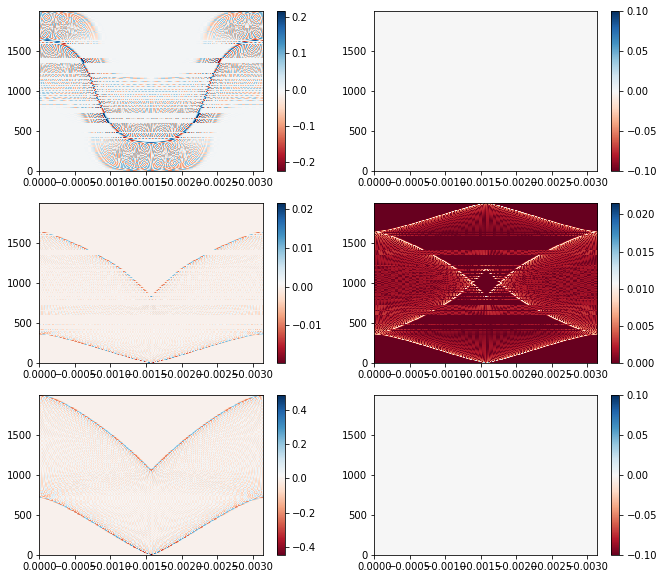

In [12]:
# Visualize basis vectors and transfMatrix
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6))=plt.subplots(figsize=(11, 10), ncols=2, nrows=3)
im1 = ax1.imshow(np.real(phin), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
im2 = ax2.imshow(np.imag(phin), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
im3 = ax3.imshow(np.real(phik), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
im4 = ax4.imshow(np.abs(phik), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
im5 = ax5.imshow(np.real(transfMatrix), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
im6 = ax6.imshow(np.imag(transfMatrix), cmap='RdBu', interpolation='none', extent=ext, aspect="auto")
fig.colorbar(im1, ax=ax1); fig.colorbar(im2, ax=ax2);
fig.colorbar(im3, ax=ax3); fig.colorbar(im4, ax=ax4);
fig.colorbar(im5, ax=ax5); fig.colorbar(im6, ax=ax6);
plt.show()

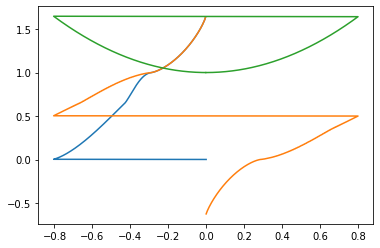

In [13]:
# Visualize frequency spectrum
#plt.plot(kL[kL<0]+nLat*dk/2., EnV[1:]+(kL[-1]**2+1.-EnV[-1]), label=r'$\omega_{eff}^2$')
plt.plot(kL[kL<=0], EnV, label=r'$\omega_{eff}^2$')
plt.plot(kL, En, label='complete spectrum')
plt.plot(kL, kL**2+1., label='complete spectrum')

En2 = np.copy(En)
En2[:knyq] = - 2.*En2[:knyq]
#plt.plot(kL, En2, label='complete spectrum')

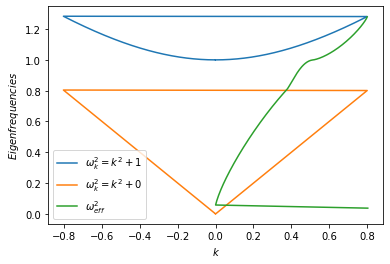

In [14]:
# Visualize frequency spectrum
plt.plot(kL, np.sqrt(kL**2. + 1.), label=r'$\omega_k^2 = k^2 + 1$')
plt.plot(kL, np.sqrt(kL**2. + 0.), label=r'$\omega_k^2 = k^2 + 0$')
plt.plot(kL[kL<=0]+nLat*dk/2., np.sqrt(EnV), label=r'$\omega_{eff}^2$')
#plt.plot(kL, En, label='complete spectrum')
plt.xlabel(r'$k$')
plt.ylabel(r'$Eigenfrequencies$')
plt.legend(); plt.show()